In [1797]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

## Dataset File

In [1798]:
#train = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/train.csv?raw=true'
df = pd.read_csv("train.csv")
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


## Test File

In [1799]:
#test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/test.csv?raw=true'
dt=pd.read_csv("test.csv")
dt

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


## Sample Submission File

In [1800]:
#sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/sample_submission.csv?raw=true'
sf=pd.read_csv("sample_submission.csv")
sf

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016
...,...,...
125685,314218,43878.016
125686,314219,43878.016
125687,314220,43878.016
125688,314221,43878.016


#Preparing the data

#Checking for Missing Data

In [1801]:
df.isnull().sum()
dt.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0


In [1802]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [1803]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


#Statistical Summary

In [1804]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [1805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


# Feature Engineering

In [1806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


##Create car age

In [1807]:
from datetime import datetime

current_year = datetime.now().year
df['car_age'] = current_year - df['model_year']
dt['car_age'] = current_year - dt['model_year']


##Create a liter column

In [1808]:
df['liter'] = pd.to_numeric(df['engine'].str.extract(r'(?P<liter>\d+\.?\d*)L')['liter'], errors='coerce')
dt['liter'] = pd.to_numeric(df['engine'].str.extract(r'(?P<liter>\d+\.?\d*)L')['liter'], errors='coerce')



## Create a horse power column (if applicable)

In [1809]:
df['horse power'] = pd.to_numeric(df['engine'].str.extract(r'([+-]?\d*\.?\d+)(?=HP)')[0], errors='coerce')
dt['horse power'] = pd.to_numeric(df['engine'].str.extract(r'([+-]?\d*\.?\d+)(?=HP)')[0], errors='coerce')


#Label Encoding

##Label brand

In [1810]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
df['brand'] = label_encoder.fit_transform(df['brand'])
dt['brand'] = label_encoder.fit_transform(dt['brand'])




##Label Model

In [1811]:


label_encoder = LabelEncoder()
df['model'] = label_encoder.fit_transform(df['model'])
dt['model'] = label_encoder.fit_transform(dt['model'])



##Label Fuel Type

In [1812]:
label_encoder = LabelEncoder()
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
dt['fuel_type'] = label_encoder.fit_transform(dt['fuel_type'])




##Label Engine

In [1813]:
df['engine'] = label_encoder.fit_transform(df['engine'])
dt['engine'] = label_encoder.fit_transform(dt['engine'])



##Label Transmission

In [1814]:
label_encoder = LabelEncoder()
df['transmission'] = label_encoder.fit_transform(df['transmission'])
dt['transmission'] = label_encoder.fit_transform(dt['transmission'])



##Label ext_col and int_col

In [1815]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
df['ext_col'] = label_encoder.fit_transform(df['ext_col'])
df['int_col'] = label_encoder.fit_transform(df['int_col'])

dt['ext_col'] = label_encoder.fit_transform(dt['ext_col'])
dt['int_col'] = label_encoder.fit_transform(dt['int_col'])



##Label Accident

In [1816]:
df['accident'] = label_encoder.fit_transform(df['accident'])

dt['accident'] = label_encoder.fit_transform(dt['accident'])


## Label Clean Title

In [1817]:
df['clean_title'] = label_encoder.fit_transform(df['clean_title'])
dt['clean_title'] = label_encoder.fit_transform(dt['clean_title'])




In [1818]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,liter,horse power
0,0,31,495,2007,213000,2,116,38,312,71,1,0,4200,17,1.6,172.0
1,1,28,930,2002,143250,2,366,38,263,10,0,0,4999,22,3.9,252.0
2,2,9,1575,2002,136731,1,640,38,38,71,1,0,13900,22,5.3,320.0
3,3,16,758,2017,19500,2,863,49,29,14,1,0,45000,7,5.0,420.0
4,4,36,1077,2021,7388,2,259,23,29,10,1,0,97500,3,2.0,208.0


# Feature Scaling (on hold)

In [1819]:
# from sklearn.preprocessing import MinMaxScaler
# non_boolean_numerical_features = ["id",
#                                   'model_year'
#                                   ,'milage'
#                                   ,'price'
#                                   ,'horse power'
#                                   ,'car_age'
#                                   ,'liter'
#                                   ,'brand_label'
#                                   , "model_label"
#                                   , "fuel_type_label"
#                                   , "engine_label"
#                                   , "transmission_label"
#                                   , "ext_col_label"
#                                   , "int_col_label"
#                                   , "accident_label"
#                                   , "clean_title_label" ]
# scaler = MinMaxScaler()
# df[non_boolean_numerical_features] = scaler.fit_transform(df[non_boolean_numerical_features])

# df.head()

#Data clean up (droppings)

In [1820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            188533 non-null  int64  
 1   brand         188533 non-null  int64  
 2   model         188533 non-null  int64  
 3   model_year    188533 non-null  int64  
 4   milage        188533 non-null  int64  
 5   fuel_type     188533 non-null  int64  
 6   engine        188533 non-null  int64  
 7   transmission  188533 non-null  int64  
 8   ext_col       188533 non-null  int64  
 9   int_col       188533 non-null  int64  
 10  accident      188533 non-null  int64  
 11  clean_title   188533 non-null  int64  
 12  price         188533 non-null  int64  
 13  car_age       188533 non-null  int64  
 14  liter         174319 non-null  float64
 15  horse power   155274 non-null  float64
dtypes: float64(2), int64(14)
memory usage: 23.0 MB


In [1821]:
df.drop(columns = ["id"], inplace= True )
dt.drop(columns = ["id"], inplace= True )

#Fill empty data

In [1822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188533 non-null  int64  
 1   model         188533 non-null  int64  
 2   model_year    188533 non-null  int64  
 3   milage        188533 non-null  int64  
 4   fuel_type     188533 non-null  int64  
 5   engine        188533 non-null  int64  
 6   transmission  188533 non-null  int64  
 7   ext_col       188533 non-null  int64  
 8   int_col       188533 non-null  int64  
 9   accident      188533 non-null  int64  
 10  clean_title   188533 non-null  int64  
 11  price         188533 non-null  int64  
 12  car_age       188533 non-null  int64  
 13  liter         174319 non-null  float64
 14  horse power   155274 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 21.6 MB


In [1823]:
mean_imputer = SimpleImputer(strategy='mean')
df['horse power'] = mean_imputer.fit_transform(df[['horse power']])

mean_imputer = SimpleImputer(strategy='mean')
df['liter'] = mean_imputer.fit_transform(df[['liter']])

mean_imputer = SimpleImputer(strategy='mean')
df['fuel_type'] = mean_imputer.fit_transform(df[['fuel_type']])

mean_imputer = SimpleImputer(strategy='most_frequent')
df['accident'] = mean_imputer.fit_transform(df[['accident']])

mean_imputer = SimpleImputer(strategy='most_frequent')
df['clean_title'] = mean_imputer.fit_transform(df[['clean_title']])

# DT

mean_imputer = SimpleImputer(strategy='mean')
dt['horse power'] = mean_imputer.fit_transform(dt[['horse power']])

mean_imputer = SimpleImputer(strategy='mean')
dt['liter'] = mean_imputer.fit_transform(dt[['liter']])

mean_imputer = SimpleImputer(strategy='mean')
dt['fuel_type'] = mean_imputer.fit_transform(dt[['fuel_type']])

mean_imputer = SimpleImputer(strategy='most_frequent')
dt['accident'] = mean_imputer.fit_transform(dt[['accident']])

mean_imputer = SimpleImputer(strategy='most_frequent')
dt['clean_title'] = mean_imputer.fit_transform(dt[['clean_title']])

#df.isnull().sum()

#Correlation (Neil)

In [1824]:
correlation = df.corr()
correlation

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,liter,horse power
brand,1.000000,-0.040049,-0.014605,-0.007286,0.211583,-0.065512,0.036984,0.006038,-0.004765,0.004809,0.022153,0.017657,0.014605,-0.081186,-0.047512
model,-0.040049,1.000000,0.001784,0.041706,0.072296,-0.042079,-0.027031,0.007560,0.076990,-0.015204,0.048268,-0.029865,-0.001784,0.013153,-0.032504
model_year,-0.014605,0.001784,1.000000,-0.669936,0.117142,0.285300,0.043596,-0.032189,0.024833,0.251286,0.264893,0.231795,-1.000000,0.000272,0.369001
milage,-0.007286,0.041706,-0.669936,1.000000,-0.155370,-0.331196,-0.041158,0.027763,-0.030846,-0.314522,-0.242779,-0.283067,0.669936,-0.032607,-0.403952
fuel_type,0.211583,0.072296,0.117142,-0.155370,1.000000,0.163478,-0.026559,0.002704,0.056844,0.074711,0.026299,0.038596,-0.117142,-0.116212,0.182878
engine,-0.065512,-0.042079,0.285300,-0.331196,0.163478,1.000000,-0.017717,-0.037814,0.006319,0.160153,-0.059727,0.208285,-0.285300,0.641493,0.829716
transmission,0.036984,-0.027031,0.043596,-0.041158,-0.026559,-0.017717,1.000000,0.005435,-0.002534,-0.015103,0.067886,0.014560,-0.043596,-0.064202,0.015832
ext_col,0.006038,0.007560,-0.032189,0.027763,0.002704,-0.037814,0.005435,1.000000,0.067904,-0.020887,-0.016666,-0.017342,0.032189,-0.006506,-0.034905
int_col,-0.004765,0.076990,0.024833,-0.030846,0.056844,0.006319,-0.002534,0.067904,1.000000,0.003289,0.084179,0.035174,-0.024833,0.013908,0.024668
accident,0.004809,-0.015204,0.251286,-0.314522,0.074711,0.160153,-0.015103,-0.020887,0.003289,1.000000,0.219384,0.123034,-0.251286,0.038299,0.186813


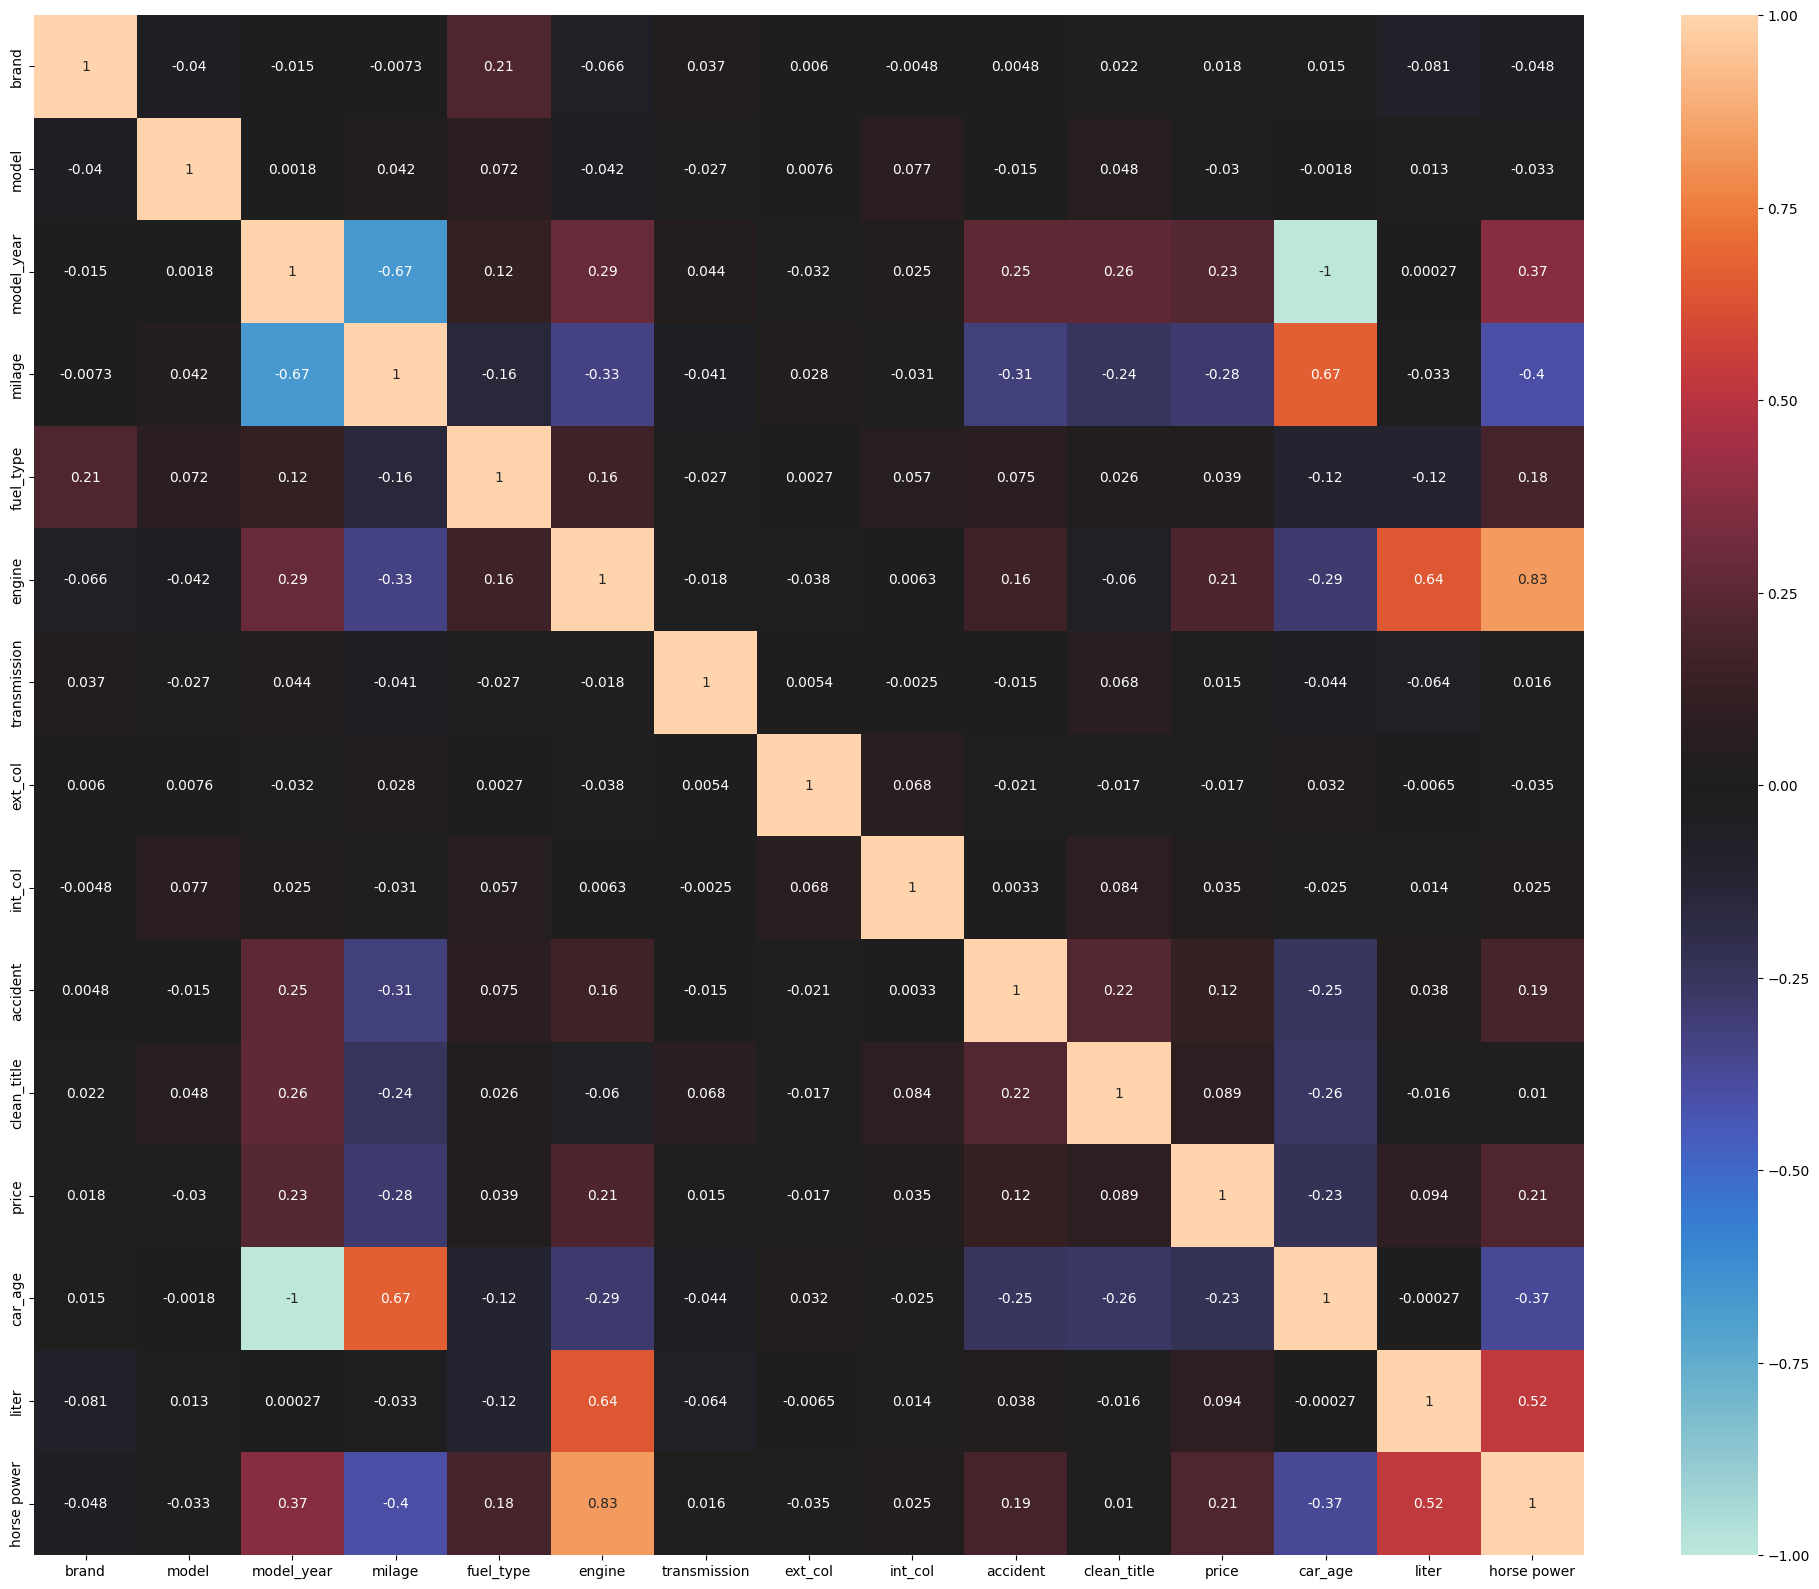

In [1825]:
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

#Split data set

In [1826]:
from sklearn.model_selection import train_test_split

y = df["price"]

# x =df.drop(['price',
#             'model_year',
#             'milage',
#             'horse power',
#             'car_age',
#             'liter',
#             'brand_label',
#             "model_label",
#             "fuel_type_label",
#             "transmission_label",
#             "ext_col_label",
#             "int_col_label",
#             "accident_label",
#             "clean_title_label" ], axis = 1)

x = df.drop(['price',



            ], axis = 1)



X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

#Linear Regression

In [1827]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [1828]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

#Evaluate the model

In [1829]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train, squared=False)
test_mse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 75812.8389063707
Testing MSE: 70236.75970291907
Training R2 Score: 0.09846341187459151
Testing R2 Score: 0.11291460034603595


#Testing


In [1830]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188533 non-null  int64  
 1   model         188533 non-null  int64  
 2   model_year    188533 non-null  int64  
 3   milage        188533 non-null  int64  
 4   fuel_type     188533 non-null  float64
 5   engine        188533 non-null  int64  
 6   transmission  188533 non-null  int64  
 7   ext_col       188533 non-null  int64  
 8   int_col       188533 non-null  int64  
 9   accident      188533 non-null  int64  
 10  clean_title   188533 non-null  int64  
 11  price         188533 non-null  int64  
 12  car_age       188533 non-null  int64  
 13  liter         188533 non-null  float64
 14  horse power   188533 non-null  float64
dtypes: float64(3), int64(12)
memory usage: 21.6 MB


In [1831]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         125690 non-null  int64  
 1   model         125690 non-null  int64  
 2   model_year    125690 non-null  int64  
 3   milage        125690 non-null  int64  
 4   fuel_type     125690 non-null  float64
 5   engine        125690 non-null  int64  
 6   transmission  125690 non-null  int64  
 7   ext_col       125690 non-null  int64  
 8   int_col       125690 non-null  int64  
 9   accident      125690 non-null  int64  
 10  clean_title   125690 non-null  int64  
 11  car_age       125690 non-null  int64  
 12  liter         125690 non-null  float64
 13  horse power   125690 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 13.4 MB


In [1832]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      125690 non-null  int64  
 1   price   125690 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [1833]:
id = sf.pop('id')
y_pred = linear_reg.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'class': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('results.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
